<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/context_awareness/response_completeness_wrt_context.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Evaluating Response Completeness WRT Context</h1>


**What is Response Completeness wrt context?**: Response Completeness with respect to context refers to the thoroughness with which a model addresses all relevant information within the context of a given question or task. It emphasizes the need for a response that not only accurately answers the question but also considers the broader context and its various dimensions.

In practical applications, such as customer support inquiries, a complete response should cover all aspects of the customer's query, taking into account specific details, potential follow-up questions, and any relevant contextual information. This ensures a more effective and satisfactory interaction with the user.

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| question    | The question asked by the user  |
| context | Additional information provided that can be used to answer the question |
| response    | The response given by the model |


 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
cases_with_complete_reponse_wrt_context = [
    {
        "question": "What are the key features of the latest smartphone model?",
        "context": "The latest smartphone model, released in 2023, boasts advanced camera technology, a high-resolution display, and a powerful processor.",
        "response": "The key features of the latest smartphone model include advanced camera technology, a high-resolution display, and a powerful processor."
    },
    {
        "question": "Can you recommend a good restaurant for a romantic dinner?",
        "context": "You mentioned that you prefer Italian cuisine and a quiet atmosphere for a romantic dinner.",
        "response": "Certainly! I recommend 'La Trattoria' for a romantic dinner. It offers delicious Italian cuisine in a quiet and intimate setting."
    },
    {
        "question": "What are the main benefits of regular exercise?",
        "context": "Regular exercise is known to have various health benefits, including improved cardiovascular health, weight management, and enhanced mood.",
        "response": "The main benefits of regular exercise include improved cardiovascular health, weight management, and enhanced mood."
    }
]

cases_with_incomplete_reponse_wrt_context = [
    {
        "question": "What are the key features of the latest smartphone model?",
        "context": "The latest smartphone model, released in 2023, boasts advanced camera technology, a high-resolution display, and a powerful processor.",
        "response": "It has a nice camera"
    },
    {
        "question": "Can you recommend a good restaurant for a romantic dinner?",
        "context": "You mentioned that you prefer Italian cuisine and a quiet atmosphere for a romantic dinner.",
        "response": "Try 'Pizzeria.'"
    },
    {
        "question": "What are the main benefits of regular exercise?",
        "context": "Regular exercise is known to have various health benefits, including improved cardiovascular health, weight management, and enhanced mood.",
        "response": "Exercise is good for your health."
    }
]

data = cases_with_complete_reponse_wrt_context + cases_with_incomplete_reponse_wrt_context

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.RESPONSE_COMPLETENESS_WRT_CONTEXT]
)

2024-01-31 16:40:20.170 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res,indent=3))

[
   {
      "question": "What are the key features of the latest smartphone model?",
      "context": "The latest smartphone model, released in 2023, boasts advanced camera technology, a high-resolution display, and a powerful processor.",
      "response": "The key features of the latest smartphone model include advanced camera technology, a high-resolution display, and a powerful processor.",
      "score_response_completeness_wrt_context": 1.0,
      "explanation_response_completeness_wrt_context": "The question asks for the key features of the latest smartphone model, and the context provides the information that the smartphone boasts advanced camera technology, a high-resolution display, and a powerful processor. The response provided includes all of these key features, so it adequately answers the given question by extracting all the relevant information from the context.\n\n1.0\n1.0"
   },
   {
      "question": "Can you recommend a good restaurant for a romantic dinner?",
    

## Step 4: Let's look at some of the results 

### Sample with Complete Response wrt Context

In [5]:
print(json.dumps(res[0],indent=3))

{
   "question": "What are the key features of the latest smartphone model?",
   "context": "The latest smartphone model, released in 2023, boasts advanced camera technology, a high-resolution display, and a powerful processor.",
   "response": "The key features of the latest smartphone model include advanced camera technology, a high-resolution display, and a powerful processor.",
   "score_response_completeness_wrt_context": 1.0,
   "explanation_response_completeness_wrt_context": "The question asks for the key features of the latest smartphone model, and the context provides the information that the smartphone boasts advanced camera technology, a high-resolution display, and a powerful processor. The response provided includes all of these key features, so it adequately answers the given question by extracting all the relevant information from the context.\n\n1.0\n1.0"
}


### Sample with Incomplete Response wrt Context

In [6]:
print(json.dumps(res[3],indent=3))

{
   "question": "What are the key features of the latest smartphone model?",
   "context": "The latest smartphone model, released in 2023, boasts advanced camera technology, a high-resolution display, and a powerful processor.",
   "response": "It has a nice camera",
   "score_response_completeness_wrt_context": 0.5,
   "explanation_response_completeness_wrt_context": "The question asks for the key features of the latest smartphone model, and the context provides the information that the smartphone boasts advanced camera technology, a high-resolution display, and a powerful processor. The response \"It has a nice camera\" only mentions one of the key features, but it does not cover the high-resolution display or the powerful processor. Therefore, the generated answer only partially answers the given question even though the context has relevant information to answer the question completely.\n\n0.5\n0.5"
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [7]:
from uptrain import Evals, APIClient, Settings

UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain API key here

uptrain_client = APIClient(
    Settings(
        uptrain_access_token=UPTRAIN_API_KEY, response_format={"type": "json_object"}
    )
)

res = uptrain_client.log_and_evaluate(
    "Sample-response-completeness-wrt-context-evals", 
    data = data, 
    checks = [Evals.RESPONSE_COMPLETENESS_WRT_CONTEXT]
)

print(json.dumps(res, indent=3))

2024-01-31 16:40:34.356 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


[
   {
      "question": "What are the key features of the latest smartphone model?",
      "context": "The latest smartphone model, released in 2023, boasts advanced camera technology, a high-resolution display, and a powerful processor.",
      "response": "The key features of the latest smartphone model include advanced camera technology, a high-resolution display, and a powerful processor.",
      "score_response_completeness_wrt_context": 1.0,
      "explanation_response_completeness_wrt_context": "The question asks for the key features of the latest smartphone model, and the context provides the information that the smartphone boasts advanced camera technology, a high-resolution display, and a powerful processor. The response provided by the machine includes all of these key features, so it adequately answers the given question by extracting all the relevant information from the context.\n\n1.0\n1.0"
   },
   {
      "question": "Can you recommend a good restaurant for a romantic

In [8]:
print(json.dumps(res,indent=3))

[
   {
      "question": "What are the key features of the latest smartphone model?",
      "context": "The latest smartphone model, released in 2023, boasts advanced camera technology, a high-resolution display, and a powerful processor.",
      "response": "The key features of the latest smartphone model include advanced camera technology, a high-resolution display, and a powerful processor.",
      "score_response_completeness_wrt_context": 1.0,
      "explanation_response_completeness_wrt_context": "The question asks for the key features of the latest smartphone model, and the context provides the information that the smartphone boasts advanced camera technology, a high-resolution display, and a powerful processor. The response provided by the machine includes all of these key features, so it adequately answers the given question by extracting all the relevant information from the context.\n\n1.0\n1.0"
   },
   {
      "question": "Can you recommend a good restaurant for a romantic

### Dashboards: 
Histogram of score vs number of cases with that score

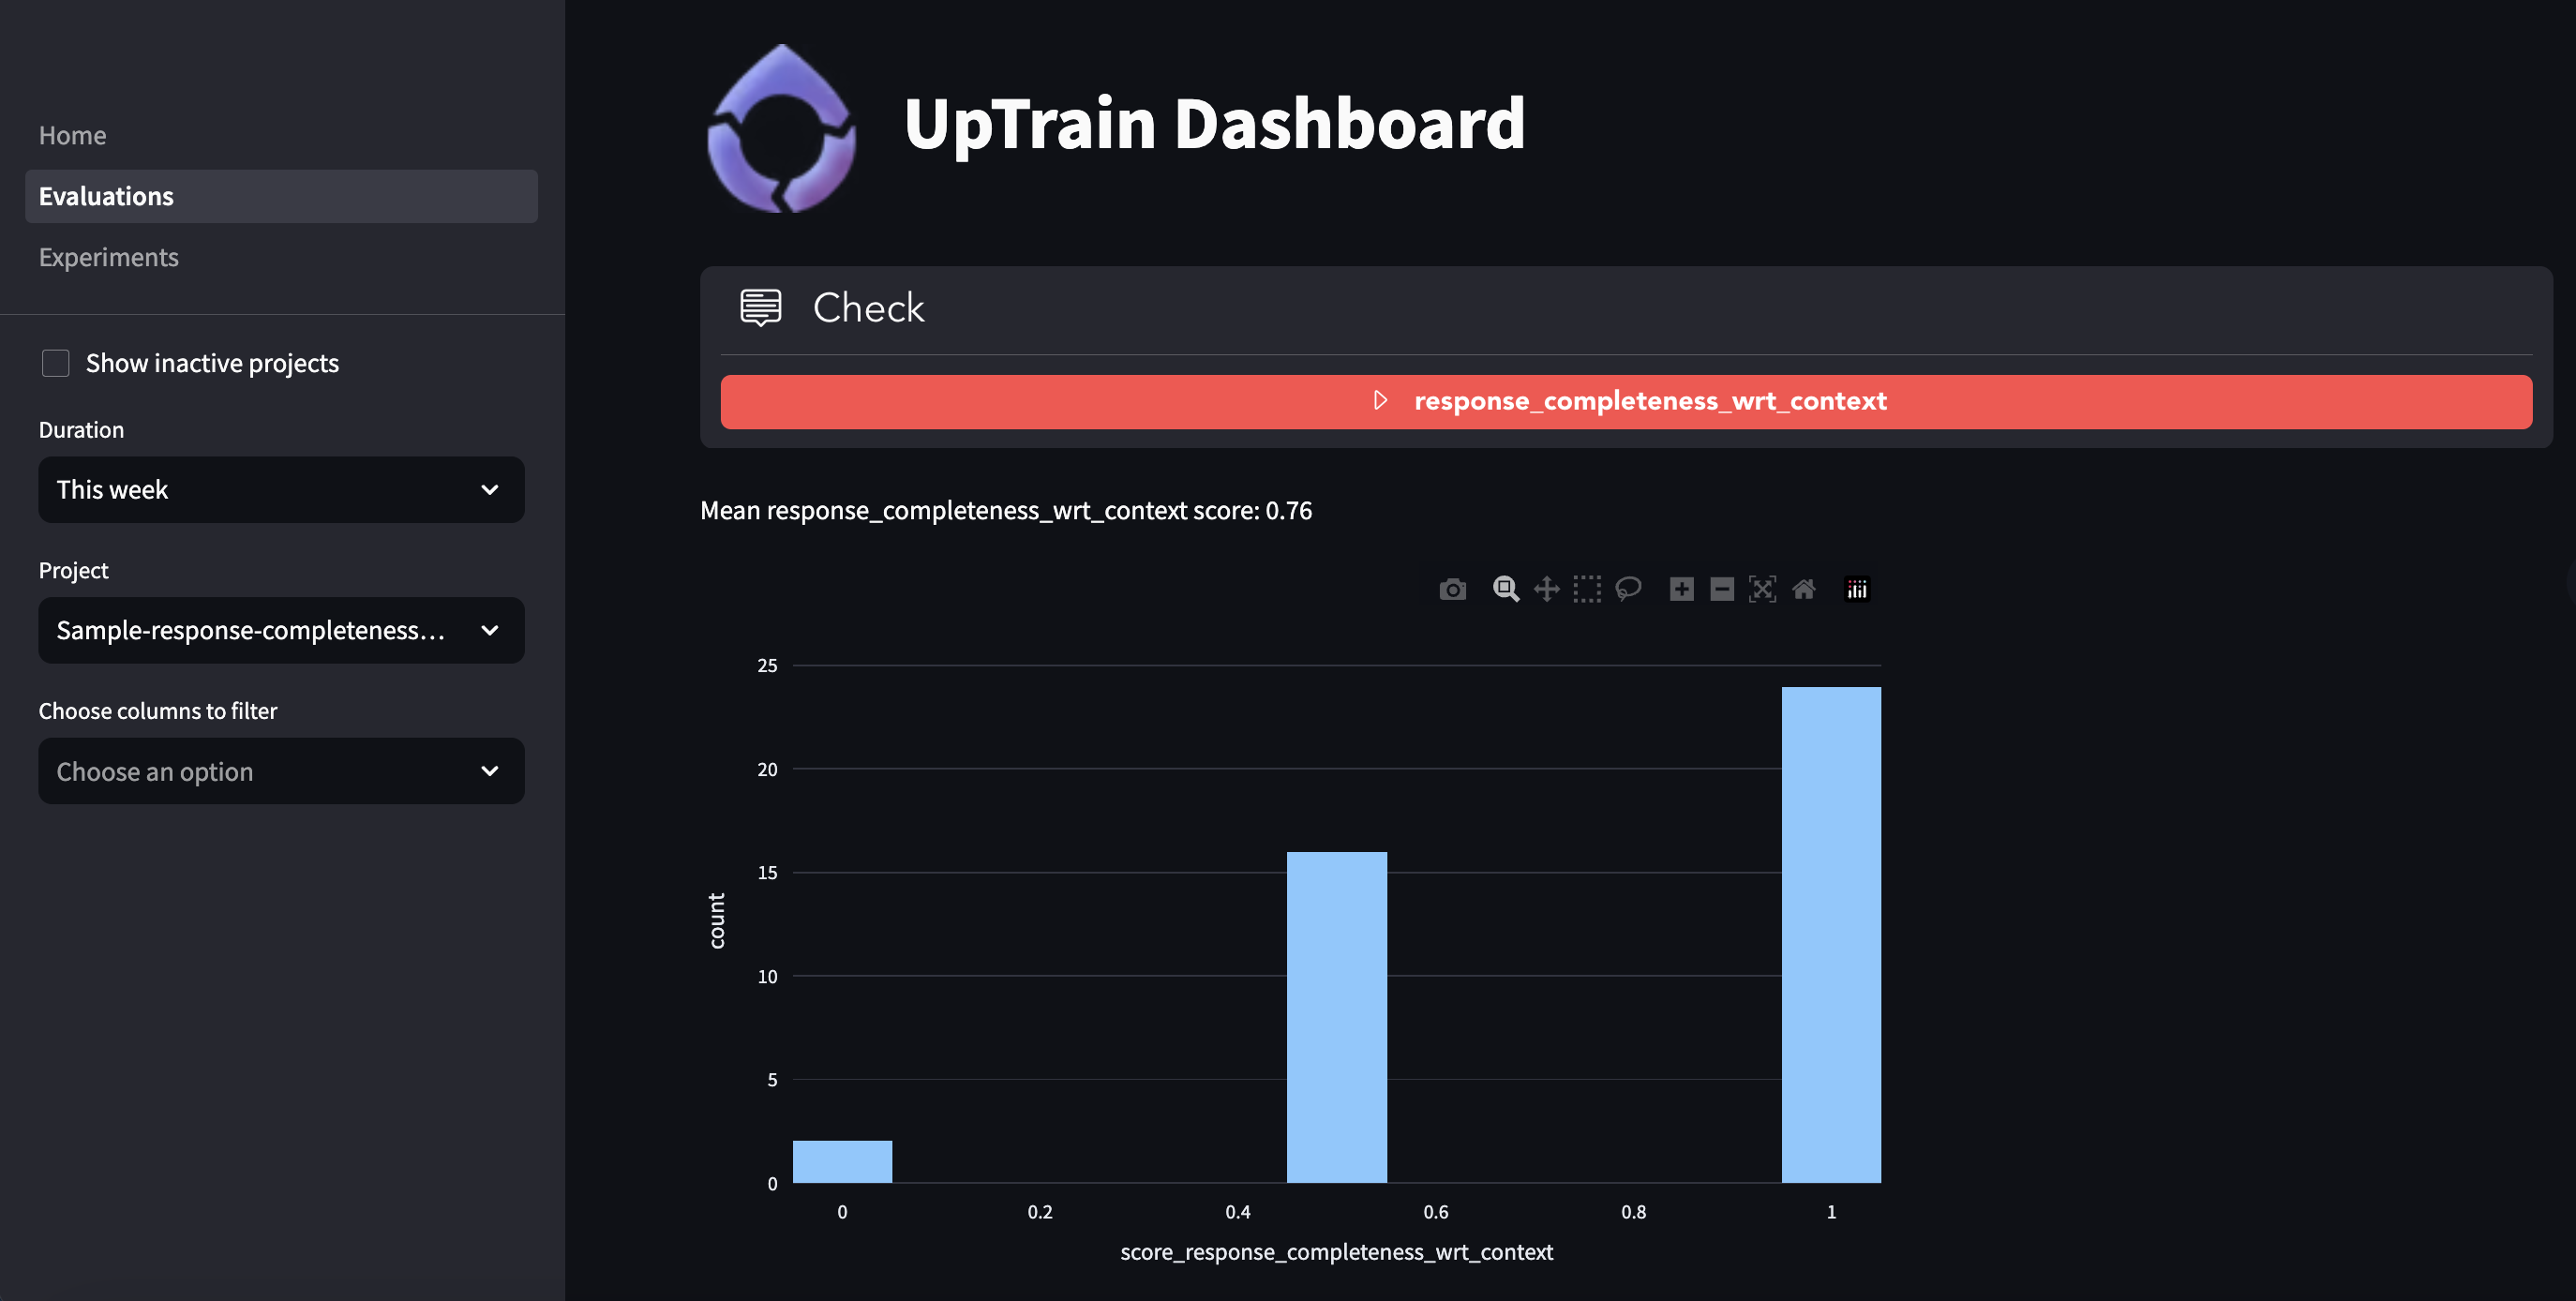

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

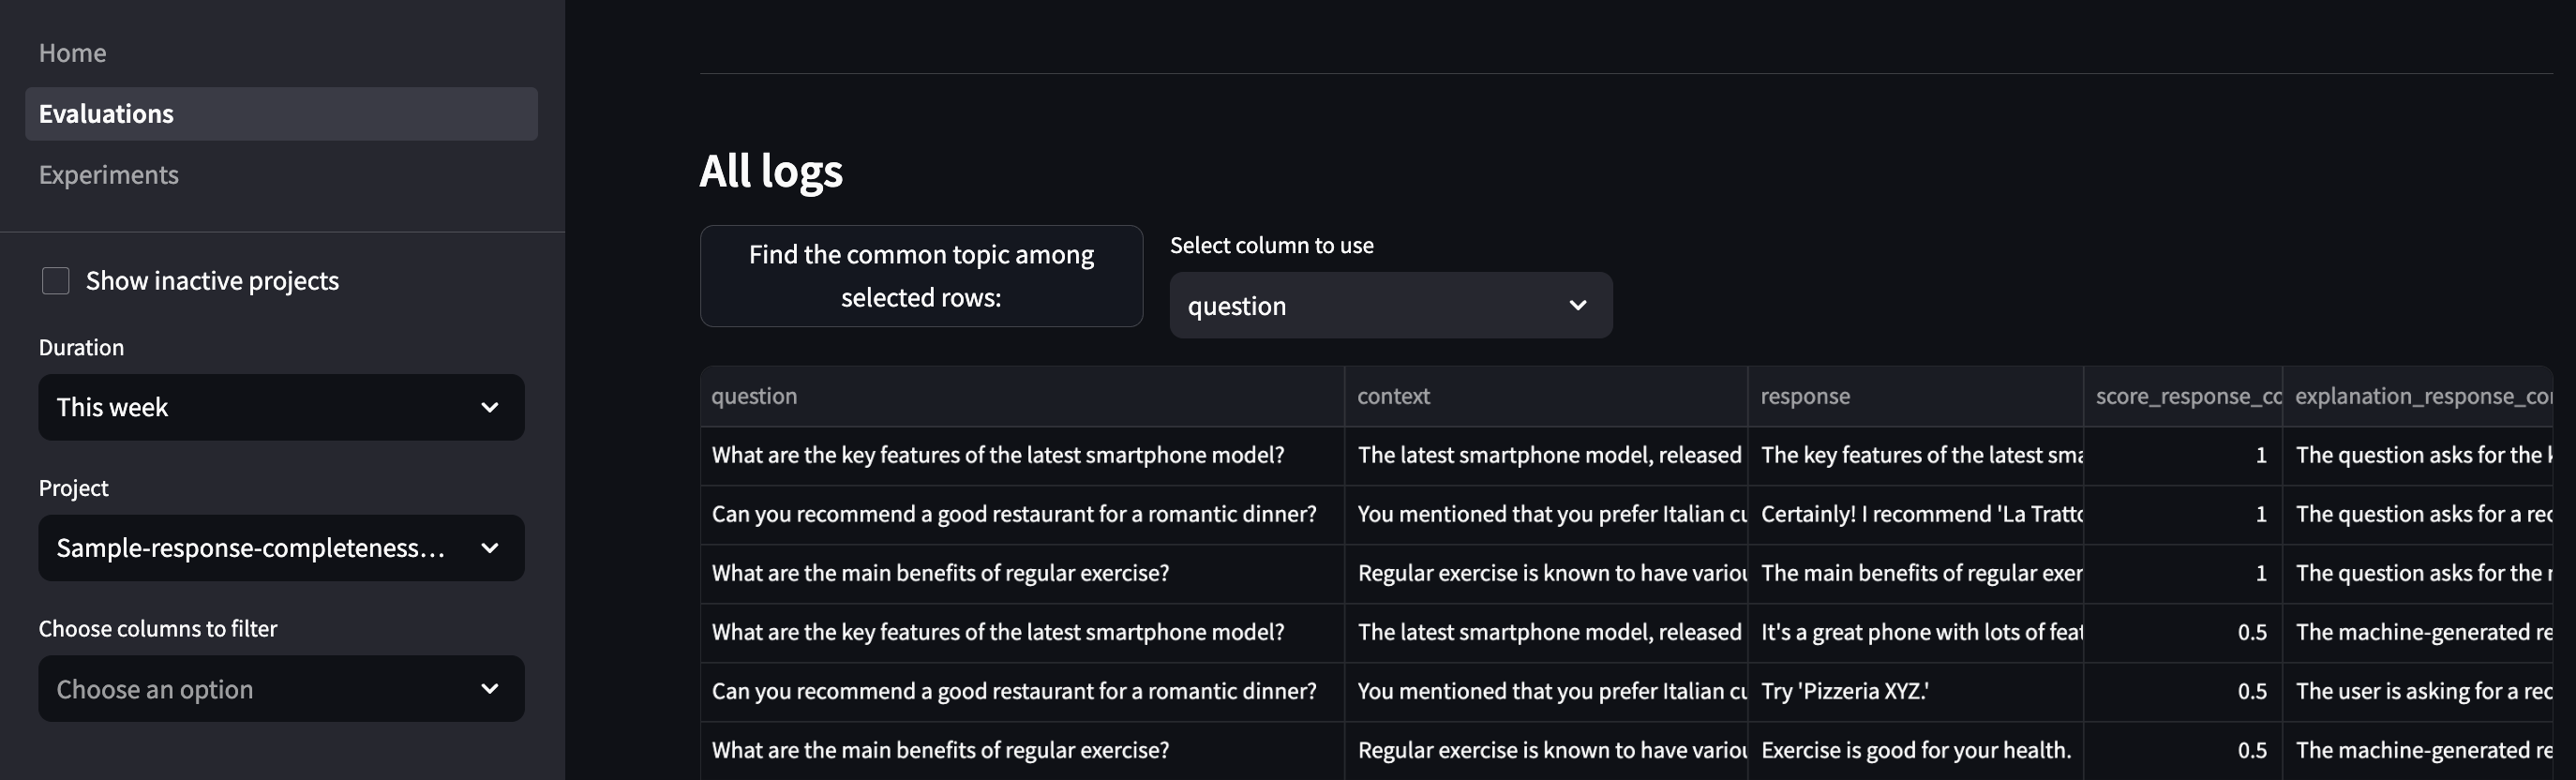